## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x_points = np.linspace(0,20)
print(x_points)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [3]:
y_points= x_points *-2 + 1 
print(y_points)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def GD(x_points,y_points,lr,epoch ,erly_stop = True):
    v=[]
    tt0=[]
    tt1=[]
    hhx =[]
    gd_threshold = 0.1
    co_threshold = 0.01
    th_thresold = 0.01
    m = len(x_points)
    th0 = th1 = 0 #init theata
   
    for i in range (epoch):
        hx = th0 +th1 * x_points

        cost = np.power(np.linalg.norm(hx-y_points),2)/(2*m)
        #print(cost)

        deltaTh0 = np.sum(hx-y_points)/m
        deltaTh1 = np.sum((hx-y_points)* x_points)/m
        
        gradiant = np.linalg.norm(np.array([deltaTh0,deltaTh1]))
        
        th0 -= lr *deltaTh0
        th1 -= lr * deltaTh1
        #print(gradiant)
        if i> 0 and erly_stop == True:
            if gradiant < gd_threshold :
                break
            
            if np.absolute(cost - v[i-1]) <co_threshold :
                break
            if np.absolute(th0-tt0[i-1]) <th_thresold and np.absolute(th1-tt1[i-1]) <th_thresold :
                break

        v.append(cost)
        tt0.append(th0)
        tt1.append(th1)
        hhx.append(hx)
    v.append(cost)
    tt0.append(th0)
    tt1.append(th1)
    hhx.append(hx)
    return v,tt0,tt1,hhx,th0,th1

#### Try your function with any input parameterss of your choice.

In [5]:
lr = 0.001
epoch = 100
v,tt0,tt1,hhx,th0,th1 =GD(x_points,y_points,lr,epoch)
print(th0,th1)
print(hhx[-1])

-0.13111095723812957 -1.8572928493264607
[ -0.13072314  -0.88506858  -1.63941402  -2.39375945  -3.14810489
  -3.90245033  -4.65679576  -5.4111412   -6.16548664  -6.91983207
  -7.67417751  -8.42852295  -9.18286838  -9.93721382 -10.69155926
 -11.44590469 -12.20025013 -12.95459557 -13.708941   -14.46328644
 -15.21763188 -15.97197731 -16.72632275 -17.48066819 -18.23501362
 -18.98935906 -19.7437045  -20.49804993 -21.25239537 -22.00674081
 -22.76108624 -23.51543168 -24.26977712 -25.02412255 -25.77846799
 -26.53281343 -27.28715886 -28.0415043  -28.79584974 -29.55019517
 -30.30454061 -31.05888605 -31.81323148 -32.56757692 -33.32192236
 -34.07626779 -34.83061323 -35.58495867 -36.3393041  -37.09364954]


#### Calculate r2 score

In [6]:
gd = r2_score(y_points, hhx[-1])
print(gd)

0.9931513543207973


#### Plot loss vs. epochs

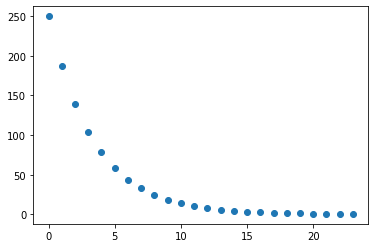

In [7]:
x_axis = [x for  x in range(len(v))]
plt.scatter(x_axis,v)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

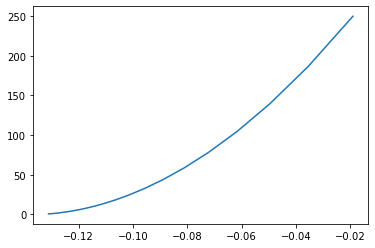

In [8]:
plt.plot(tt0,v)

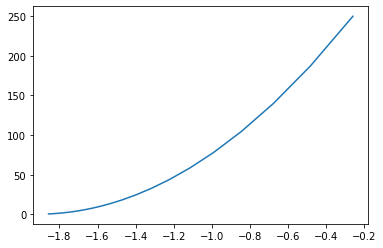

In [9]:
plt.plot(tt1,v)

#### Plot all regression lines till converge

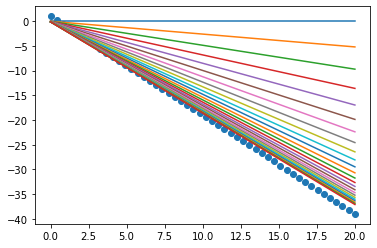

In [10]:
plt.scatter(x_points,y_points)
for l in hhx :
    plt.plot(x_points,l)
plt.show()

#### Plot the best regression line

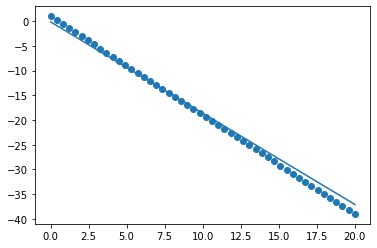

In [11]:
plt.scatter(x_points,y_points)
plt.plot(x_points,hhx[-1])

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [12]:
learn_rate = [0.01,0.001,0.003,0.005,0.007,0.005]
epoch=[10,50,100,1000,2000,5000,10000]

In [13]:
best =0
theta0=0
theta1 = 0
ee =ll = 0
for l in learn_rate :
    for e in epoch:
        v,tt0,tt1,hhx,th0,th1 =GD(x_points,y_points,l,e,erly_stop = False) #stop erly_stop to test epoch
        score = r2_score(y_points, hhx[-1])
        print(f'for lr = {l} and #epoch= {e}  :  r2Score = {score}')
        if score> best: 
            best = score
            theta0,theta1 = th0,th1
            ll,ee =l,e
        

for lr = 0.01 and #epoch= 10  :  r2Score = 0.9976867464600793
for lr = 0.01 and #epoch= 50  :  r2Score = 0.9981158984360666
for lr = 0.01 and #epoch= 100  :  r2Score = 0.9985421521012721
for lr = 0.01 and #epoch= 1000  :  r2Score = 0.9999855903143118
for lr = 0.01 and #epoch= 2000  :  r2Score = 0.9999999147267902
for lr = 0.01 and #epoch= 5000  :  r2Score = 0.9999999999999823
for lr = 0.01 and #epoch= 10000  :  r2Score = 1.0
for lr = 0.001 and #epoch= 10  :  r2Score = 0.7354668800709218
for lr = 0.001 and #epoch= 50  :  r2Score = 0.9976352360258535
for lr = 0.001 and #epoch= 100  :  r2Score = 0.9976972946618887
for lr = 0.001 and #epoch= 1000  :  r2Score = 0.9985480092049996
for lr = 0.001 and #epoch= 2000  :  r2Score = 0.9991301654858865
for lr = 0.001 and #epoch= 5000  :  r2Score = 0.9998129942524259
for lr = 0.001 and #epoch= 10000  :  r2Score = 0.9999855715785616
for lr = 0.003 and #epoch= 10  :  r2Score = 0.9973086286297487
for lr = 0.003 and #epoch= 50  :  r2Score = 0.99775328142

In [14]:
print(f'best fit with lr = {ll} and #epoch= {ee}  :  r2Score = {best}')

best fit with lr = 0.01 and #epoch= 10000  :  r2Score = 1.0


In [15]:
v,tt0,tt1,hhx,th0,th1 =GD(x_points,y_points,ll,ee,erly_stop = False) #stop erly_stop to test epoch

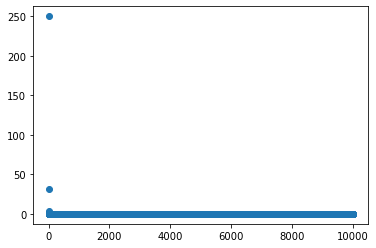

In [16]:
x_axis = [x for  x in range(len(v))]
plt.scatter(x_axis,v)

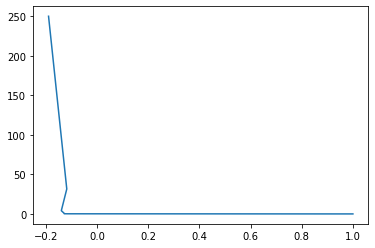

In [17]:
plt.plot(tt0,v)

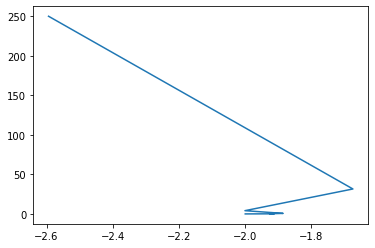

In [18]:
plt.plot(tt1,v)

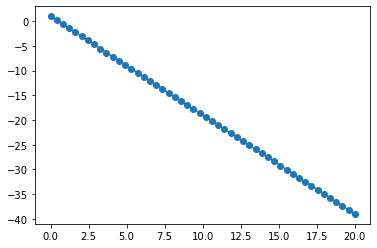

In [19]:
plt.scatter(x_points,y_points)
plt.plot(x_points,hhx[-1])

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [20]:
def Mini_gd(x_points,y_points,size,lr,epoch,shuffle = False):
    gd_threshold = 0.01
    co_threshold = 0.001
    th_thresold = 0.001
    m = len(x_points)
    n_o_patch =np.ceil(m /size).astype('int') #number of batches
    
    mat = np.copy(np.vstack((x_points,y_points)))
    if shuffle == True :
        np.random.shuffle(mat)

    loss=[]
    theta0=[]
    theta1 = []
    predict = []
    th0 = th1 = 0 #init theata
    
    for i in range (epoch):
        j = 0
        while j < m :
            x = mat[0,j:j+size]
            y = mat[1,j:j+size]
            
            b = len(x)  #batch size
            #print("batch",j, "size",b)
            hx = th0 +th1 * x
            cost = np.sum(np.power((hx-y),2))/(2*b)
            
            deltaTh0 = np.sum(hx-y)/b
            deltaTh1 = np.sum((hx-y)* x)/b
            
            th0 -= lr *deltaTh0
            th1 -= lr * deltaTh1
            #append data every patch
             
            loss.append(cost)
            theta0.append(th0)
            theta1.append(th1)
            
            
            j +=size
        #print (cost)
    
        predict.append(hx)
        gradiant = np.linalg.norm(np.array([deltaTh0,deltaTh1]))
        if i >0 :
            if gradiant < gd_threshold :
                break

            if np.absolute(cost - loss[i]) <co_threshold :
                break
            if np.absolute(th0-theta0[i]) <th_thresold and np.absolute(th1-theta1[i]) <th_thresold :
                break
    return loss,theta0,theta1,predict,n_o_patch
        
            

In [21]:
lr = 0.001
epoch = 100
loss,theta0,theta1,predict,n_b = Mini_gd(x_points,y_points,4,lr,epoch,shuffle = False)
print(theta0[-1],theta1[-1])

-0.038675139200238996 -1.9388053277306454


In [22]:
from sklearn.metrics import r2_score
hx = theta0[-1] +theta1[-1] * x_points
mini_gd = r2_score(y_points, hx) 
print(mini_gd)

0.997751632443335


In [23]:
if gd > mini_gd :
    print("gd is better")
else : print("mini gd is better")

mini gd is better


### plot each epoch

#### Plot loss vs. epochs

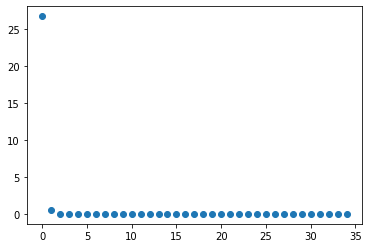

In [24]:
epochs = [loss[i] for i in range(n_b-1,len(loss),n_b)]
x_axis = [x for  x in range(len(epochs))]
plt.scatter(x_axis,epochs)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

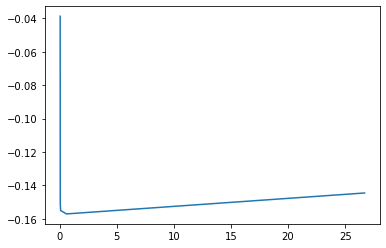

In [25]:
plt.plot([loss[i] for i in range(n_b-1,len(loss),n_b)],[theta0[i] for i in range(n_b-1,len(loss),n_b)])

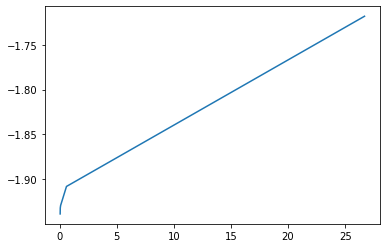

In [26]:
plt.plot([loss[i] for i in range(n_b-1,len(loss),n_b)],[theta1[i] for i in range(n_b-1,len(loss),n_b)])

### plot each patch

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'theta0')

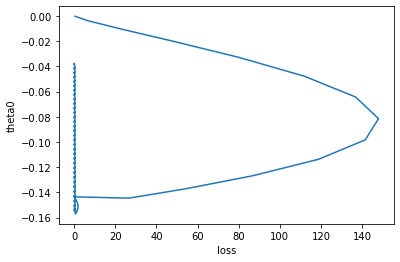

In [27]:
plt.plot(loss,theta0)
plt.xlabel("loss")
plt.ylabel("theta0")

Text(0, 0.5, 'theta0')

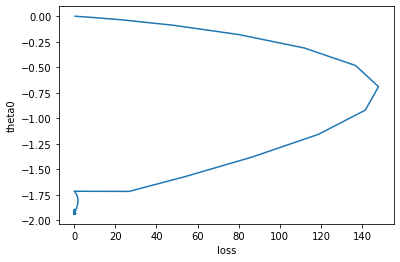

In [28]:
plt.plot(loss,theta1)
plt.xlabel("loss")
plt.ylabel("theta0")

#### Plot the best regression line

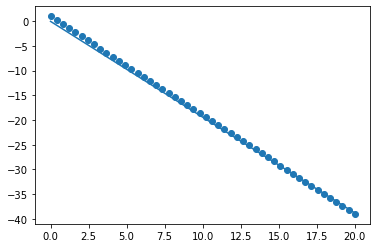

In [29]:
plt.scatter(x_points,y_points)
plt.plot(x_points,hx)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [30]:
def Stochastic_gd(x_points,y_points,size,lr,epoch,shuffle = False):
    gd_threshold = 0.1
    co_threshold = 0.01
    th_thresold = 0.01
    m = len(x_points)
    
    mat = np.copy(np.vstack((x_points,y_points)))
    if shuffle == True :
        np.random.shuffle(mat)

    loss=[]
    theta0=[]
    theta1 = []
    th0 = th1 = 0 #init theata
    
    x = mat[0,:]
    y = mat[1,:]
    
    for i in range (epoch):
        j = 0
        for  j in range(m) :
            
            hx = th0 +th1 * x[j]
            cost = np.sum(np.power((hx-y[j]),2))/2
            
            deltaTh0 = hx-y[j]
            deltaTh1 = (hx-y[j]) * x[j]
            
            th0 -= lr *deltaTh0
            th1 -= lr * deltaTh1
            #append data every patch

        loss.append(cost)
        theta0.append(th0)
        theta1.append(th1)
                        
#         print (cost)
    
        gradiant = np.linalg.norm(np.array([deltaTh0,deltaTh1]))
        if i >0 :
            if gradiant < gd_threshold :
                break

            if np.absolute(cost - loss[i]) <co_threshold :
                break
            if np.absolute(th0-theta0[i]) <th_thresold and np.absolute(th1-theta1[i]) <th_thresold :
                break
    return loss,theta0,theta1
        
            

In [31]:
lr = 0.001
epoch = 1000
sloss,stheta0,stheta1 = Stochastic_gd(x_points,y_points,4,lr,epoch,shuffle = True)
print(stheta0[-1],stheta1[-1])

-0.22186680286109717 -1.9364954235258125


In [32]:
from sklearn.metrics import r2_score
shx = stheta0[-1] +stheta1[-1] * x_points
sto_gd = r2_score(y_points, shx) 
print(sto_gd)

0.9965103822493281


### plot each epoch

#### Plot loss vs. epochs

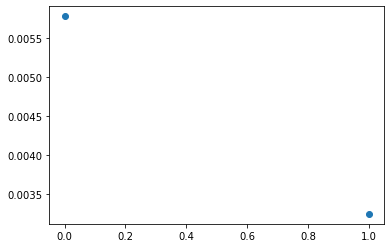

In [33]:
x_axis = [x for  x in range(len(sloss))]
plt.scatter(x_axis,sloss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'theta0')

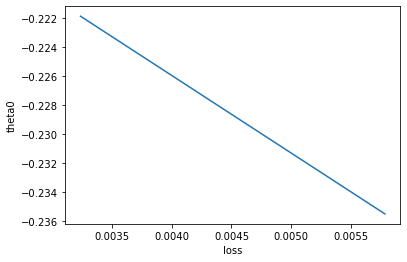

In [34]:
plt.plot(sloss,stheta0)
plt.xlabel("loss")
plt.ylabel("theta0")

Text(0, 0.5, 'theta0')

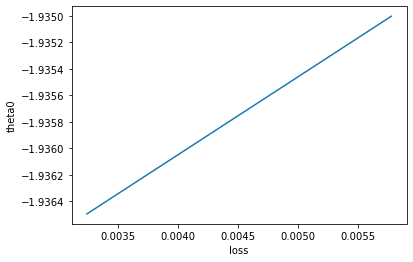

In [35]:
plt.plot(sloss,stheta1)
plt.xlabel("loss")
plt.ylabel("theta0")

#### Plot the best regression line

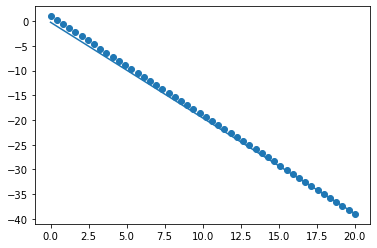

In [36]:
plt.scatter(x_points,y_points)
plt.plot(x_points,shx)